<a href="https://colab.research.google.com/github/cerasole/EnvironmentalRadioactivity/blob/main/Notebooks/Nuclei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download of the dataset

In [2]:
!wget -O nndc_nudat_data_export.csv https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/nndc_nudat_data_export.csv

--2024-11-30 08:40:59--  https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/nndc_nudat_data_export.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2050406 (2.0M) [text/plain]
Saving to: ‘nndc_nudat_data_export.csv’

nndc_nudat_data_exp 100%[===================>]   1.96M  --.-KB/s    in 0.07s   

2024-11-30 08:40:59 (26.6 MB/s) - ‘nndc_nudat_data_export.csv’ saved [2050406/2050406]



In [ ]:
import glob
glob.glob("*")

['nndc_nudat_data_export.csv', 'sample_data']

### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font", size = 16)          # Style options

### Read the file

In [4]:
df = pd.read_csv("nndc_nudat_data_export.csv")
df

,z,n,name,levelEnergy(MeV),halflife,halflifeUnit,halflifeUncertainty,spinAndParity,decayMode,branchingRatio,...,CFY239Pu,CFY239PuUncertainty,CFY252Cf,CFY252CfUncertainty,CFY238U,CFY238UUncertainty,CFY241U,CFY241UUncertainty,secondTwoPlusEnergy,secondTwoPlusEnergyUncertainty
0,0,1,1n,0,608.9,s,0.3,1/2+,B-,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,3H,0,12.3221,y,0.0106,1/2+,B-,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,4H,0,3.3,MeV,0.3,2-,N,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,5H,0,5.3,MeV,0.4,(1/2+),2N,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,6,7H,0,0.18,MeV,+0.47-0.13,1/2+,2N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6338,116,177,293Lv,0,95,ms,+63-27,NaN,A,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6339,117,176,293Ts,0,21,ms,+7-4,NaN,A,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6340,117,177,294Ts,0,51,ms,+38-16,NaN,A,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6341,118,176,294Og,0,0.58,ms,+0.44-0.18,0+,A,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.columns

Index(['z', 'n', 'name', 'levelEnergy(MeV)', 'halflife', 'halflifeUnit',
       'halflifeUncertainty', 'spinAndParity', 'decayMode', 'branchingRatio',
       'branchingRatioUncertainty', 'massExcess(keV)', 'massExcessUncertainty',
       'betaMinus', 'betaMinusUncertainty', 'electronCapture',
       'electronCaptureUncertainty', 'positronEmission',
       'positronEmissionUncertainty', 'neutronSeparationEnergy',
       'neutronSeparationEnergyUncertainty', 'protonSeparationEnergy',
       'protonSeparationEnergyUncertainty', 'alpha', 'alphaUncertainty',
       'deltaAlpha', 'deltaAlphaUncertainty', 'twoNeutronSeparationEnergy',
       'twoNeutronSeparationEnergyUncertainty', 'twoProtonSeparationEnergy',
       'twoProtonSeparationEnergyUncertainty', 'doubleBetaMinus',
       'doubleBetaMinusUncertainty', 'doubleElectronCapture',
       'doubleElectronCaptureUncertainty', 'electronCaptureOneProtonEmission',
       'electronCaptureOneProtonEmissionUncertainty',
       'betaMinusOneNeutro

### Extract the numbers of protons (Z) and neutrons (N) from the file

In [8]:
Z, N = df["z"].to_numpy(), df["n"].to_numpy()

In [ ]:
Z, N

(array([  0,   1,   1, ..., 117, 118, 118]),
 array([  1,   2,   3, ..., 177, 176, 176]))

In [ ]:
type(Z)

numpy.ndarray

In [ ]:
n_nuclei = len(Z)
n_nuclei

6343

### Plot of Z vs N

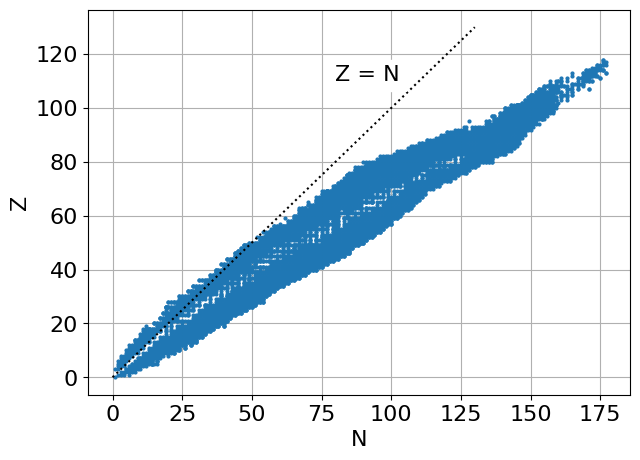

In [ ]:
fig, ax = plt.subplots(figsize = (7, 5))
ax.plot(N, Z, ls = "None", marker = "o", markersize = 2, color = "tab:blue")
ax.plot([0, 130], [0, 130], ls = "dotted", color = "black")
ax.text(80, 110, "Z = N", bbox = {"facecolor":"white", "edgecolor" : "white"})
ax.set(xlabel = "N", ylabel = "Z")
ax.set_ylabel("Z")
ax.grid()
fig.savefig("Nuclei.png")  ### Save the plot into a png file

### Plot of binding energy per nucleon vs A

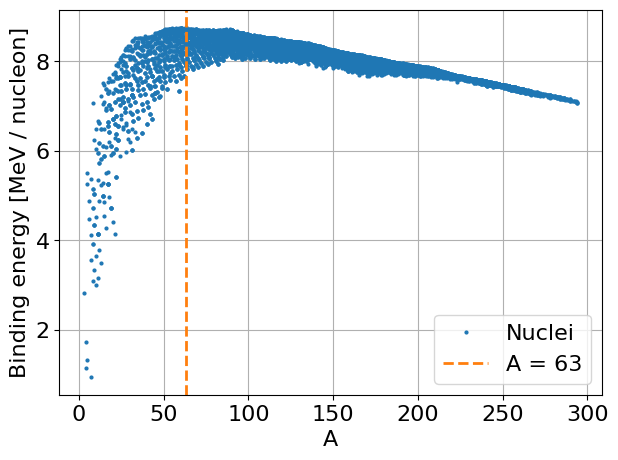

In [25]:
bindingEnergy_MeV = df["bindingEnergy"].astype("float64") / 1000   ### Divide by 1000 to get values in MeV
A = Z + N
most_bounded_nucleus = A[np.argmax(bindingEnergy_MeV)]

# Plot
fig, ax = plt.subplots(figsize = (7, 5))
ax.plot(A, bindingEnergy_MeV, linestyle = "None", marker = "o", markersize = 2, color = "tab:blue", label = "Nuclei")
ax.axvline(most_bounded_nucleus, linestyle = "dashed", color = "tab:orange", label = f"A = {most_bounded_nucleus}", linewidth = 2)
ax.set(xlabel = "A", ylabel = "Binding energy [MeV / nucleon]")
ax.legend()
ax.grid()
fig.savefig("BindingEnergy.png")